### 1. Data Visualization

In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head(10)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


RestingBP and Cholesterol have min 0
Change values from 0 to null for those two columns
#Need to discuss how to handle them 

In [34]:
# Calculate median for 'RestingBP' and 'Cholesterol'
median_RestingBP = df['RestingBP'].median()
median_Cholesterol = df['Cholesterol'].median()

# Replace NaNs with the median
df['RestingBP'].fillna(median_RestingBP, inplace=True)
df['Cholesterol'].fillna(median_Cholesterol, inplace=True)

df.isnull().sum() / df.shape[0]

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [35]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [36]:
fig = px.pie(df, names='HeartDisease', title='Percentage for each outcome')
fig.update_layout(width=500, height=300)
fig.show()

In [37]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [38]:
df.groupby(['HeartDisease', 'Sex'])[['Age']].describe().T

HeartDisease           0                      1            
Sex                    F           M          F           M
Age count     143.000000  267.000000  50.000000  458.000000
    mean       51.202797   50.202247  56.180000   55.868996
    std         9.627981    9.344911   8.220656    8.788562
    min        30.000000   28.000000  33.000000   31.000000
    25%        44.000000   42.000000  51.000000   51.000000
    50%        51.000000   51.000000  58.000000   57.000000
    75%        57.000000   57.000000  62.000000   62.000000
    max        76.000000   75.000000  73.000000   77.000000

In [39]:
fig = px.box(df, y="Age", x="HeartDisease", points="all",  color="Sex",
             title="Distribution of age of database participants (stratified by outcome)")
fig.show()

In [40]:
fig = px.box(df, y="Age", x="HeartDisease", points="all", 
             title="Distribution of age of database participants (stratified by outcome)")

fig.show()

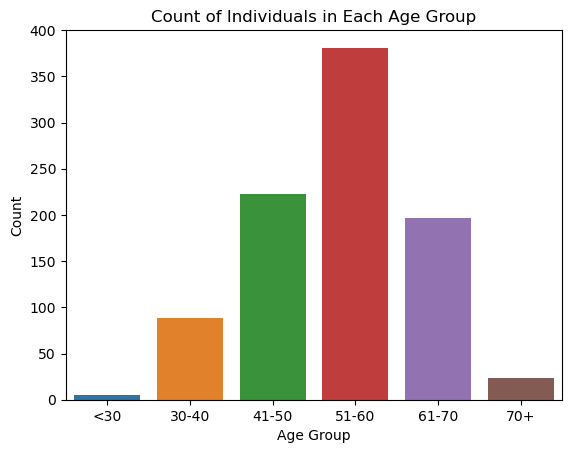

In [41]:
unique_ages = df['Age'].unique()

bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(x='AgeGroup', data=df)
plt.title("Count of Individuals in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

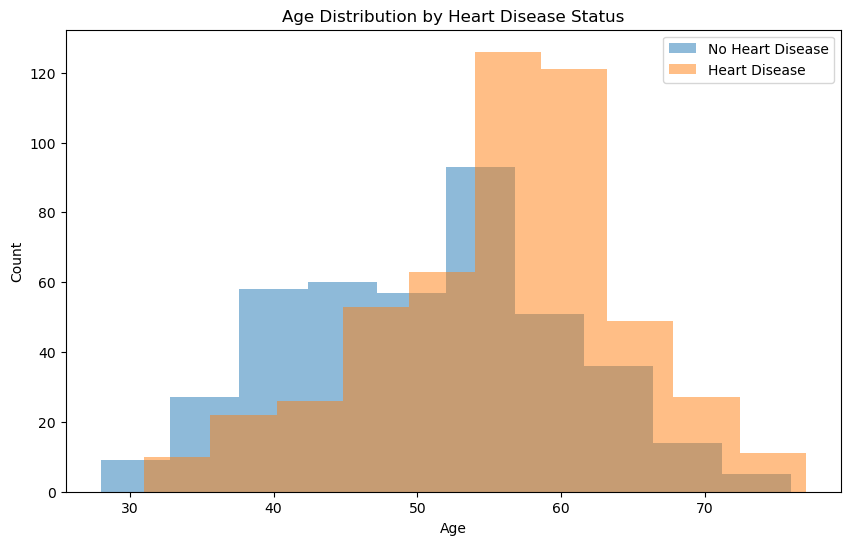

In [42]:
df_no_disease = df[df['HeartDisease'] == 0]
df_with_disease = df[df['HeartDisease'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df_no_disease['Age'], alpha=0.5, label='No Heart Disease')
plt.hist(df_with_disease['Age'], alpha=0.5, label='Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [43]:
df_copy = df.copy()
df_copy['c'] = 1
df_copy.groupby(['HeartDisease', 'Sex']).agg('count')[['c']]

c
HeartDisease Sex     
0            F    143
             M    267
1            F     50
             M    458

In [44]:
fig = px.histogram(df_copy, x="Sex", y="c",
             color='HeartDisease', barmode='group',
             title="Distribution of outcome of database participants (stratified by sex)")
fig.update_layout(width=700, height=300)

fig.show()

### 2. Data cleaning and pre-processing

#### 2.1 Data cleaning

In [45]:
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

sex = df.pop("Sex") # Pop function drops and assigns at the same time
df.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60
5,39,NAP,120,339,0,Normal,170,N,0.0,Up,0,30-40
6,45,ATA,130,237,0,Normal,170,N,0.0,Up,0,41-50
7,54,ATA,110,208,0,Normal,142,N,0.0,Up,0,51-60
8,37,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,30-40
9,48,ATA,120,284,0,Normal,120,N,0.0,Up,0,41-50


In [46]:
numeric_features = ["Age", "RestingBP", "Cholesterol", "Oldpeak", "RestingBP", "MaxHR", "Oldpeak"]
X[numeric_features][:5]


,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,40,140,289,0.0,140,172,0.0
1,49,160,180,1.0,160,156,1.0
2,37,130,283,0.0,130,98,0.0
3,48,138,214,1.5,138,108,1.5
4,54,150,195,0.0,150,122,0.0


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[numeric_features] = scaler.fit_transform(X[numeric_features])
data = X[numeric_features]
X_num = pd.DataFrame(data, columns=numeric_features)
X_num[:5]

,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.832432,0.410909,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.105664,1.491752,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.832432,-0.129513,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,0.574711,0.302825,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.832432,0.951331,-0.581981,-0.832432


In [48]:
categorical_features = ["ChestPainType", "RestingECG", "ST_Slope"]
X[categorical_features][:5]

,ChestPainType,RestingECG,ST_Slope
0,ATA,Normal,Up
1,NAP,Normal,Flat
2,ATA,ST,Up
3,ASY,Normal,Flat
4,NAP,Normal,Up


In [49]:
binary_features = ["Sex", "FastingBS", "ExerciseAngina"]
X[binary_features][:5]

,Sex,FastingBS,ExerciseAngina
0,M,0,N
1,F,0,N
2,M,0,N
3,F,0,Y
4,M,0,N


In [50]:
from sklearn.preprocessing import OrdinalEncoder

binary_transformer = OrdinalEncoder()

data = binary_transformer.fit_transform(X[binary_features])
X_bin = pd.DataFrame(data, columns=binary_features)
X_bin[:5]

,Sex,FastingBS,ExerciseAngina
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [51]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
data = categorical_transformer.fit_transform(X[categorical_features]).toarray()
cols = categorical_transformer.get_feature_names_out()
X_cat = pd.DataFrame(data, columns=cols)
X_cat[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [52]:
X_data = pd.concat([X_cat, X_bin, X_num], axis = 1)
X_data[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex,FastingBS,ExerciseAngina,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.433140,0.410909,0.825070,-0.832432,0.410909,1.382928,-0.832432
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.478484,1.491752,-0.171961,0.105664,1.491752,0.754157,0.105664
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.751359,-0.129513,0.770188,-0.832432,-0.129513,-1.525138,-0.832432
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.584556,0.302825,0.139040,0.574711,0.302825,-1.132156,0.574711
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.051881,0.951331,-0.034755,-0.832432,0.951331,-0.581981,-0.832432


#### 2.1 Feature Scaling

### 3. Train/Test Data Split

In [53]:
from sklearn.model_selection import train_test_split

sensitive_attributes = X_data['Sex']

X_train, X_test, y_train, y_test, sa_train, sa_test = train_test_split(X_data, y, sensitive_attributes, test_size=0.2, random_state=42)

### 4. Model Training

#### SVM Classifier

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type of kernel
    # Add 'degree': [2, 3, 4] if you want to tune 'poly' kernel degree
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, refit=True, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters Found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters Found:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Best Parameters Found:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

# Create the SVM model with the best parameters
svm_model = SVC(C=100, gamma=0.001, kernel='rbf')

# Train the model
svm_model.fit(X_train, y_train)
y_train_pred = svm_model.predict(X_train) 
y_test_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
 [[67 10]
 [18 89]]
Accuracy: 0.8478260869565217


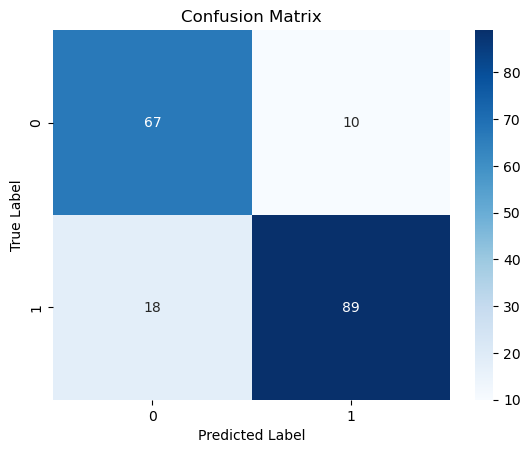

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The top-left cell (66) represents the True Negatives (TN): The number of negative instances correctly predicted by the model.

The top-right cell (11) represents the False Positives (FP): The number of negative instances incorrectly predicted as positive.

The bottom-left cell (26) represents the False Negatives (FN): The number of positive instances incorrectly predicted as negative.

The bottom-right cell (81) represents the True Positives (TP): The number of positive instances correctly predicted by the model.

------------------------------------

Fairlearn's MetricFrame is used to compute these metrics across different groups. It takes the true labels (y_test), the model predictions (y_pred), and the sensitive attributes (sa_test).

Overall Metrics: mf.overall provides the metrics computed over the entire dataset.

Metrics by Group: mf.by_group shows the performance of each metric for each subgroup defined by the sensitive attributes.

Disparities: Optionally, you can compute disparities in metrics between groups, which can help in identifying which groups are being treated unfairly by the model.

The selection rate is the rate at which positive outcomes (e.g., predicting heart disease) are assigned. It is particularly useful in fairness analysis to understand how often each group (defined by sensitive attributes like age and gender) is receiving a positive prediction.

In [57]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, false_positive_rate, false_negative_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    "FPR": false_positive_rate,
    "FNR": false_negative_rate,
    'Selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test)

# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Overall Metrics:
 Accuracy          0.847826
Precision         0.898990
Recall            0.831776
FPR               0.129870
FNR               0.168224
Selection_rate    0.538043
dtype: float64

Metrics by Group:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.777778   0.625000  0.625000  0.157895  0.375000        0.296296
1.0  0.859873   0.923077  0.848485  0.120690  0.151515        0.579618

Disparities:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.917379   0.695225  0.751404  1.215789  2.229167        0.550692
1.0  1.014209   1.026793  1.020089  0.929310  0.900673        1.077270


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



Overall Model Performance Metrics

- Accuracy (85.87%): The model correctly predicts heart disease status in about 86 out of 100 cases.
- Precision (88.57%): When the model predicts heart disease, there's about an 89% chance that the patient actually has heart disease.
- Recall (86.92%): The model correctly identifies about 87% of all actual cases of heart disease.
- F1 Score (87.74%): Indicates a good balance between precision and recall.
- Selection Rate (57.07%): About 57% of the predictions made by the model are positive for heart disease.

Metrics by Gender Group

Female (Sex = 0.0)

Accuracy: 74.07% (lower than the overall accuracy)
Precision: 55.56% (significantly lower than the overall precision)
Recall: 62.50% (lower than the overall recall)
F1 Score: 58.82% (lower than the overall F1 score)

Male (Sex = 1.0)

Accuracy: 87.90% (slightly higher than the overall accuracy)
Precision: 91.67% (higher than the overall precision)
Recall: 88.89% (slightly higher than the overall recall)
F1 Score: 90.26% (higher than the overall F1 score)

Disparities

Female (Sex = 0.0)

All metrics are below 1, indicating underperformance for females across all measured aspects.

Male (Sex = 1.0)

All metrics exceed 1, indicating that the model performs better for males across all measures.

----------------------
Demographic Parity: It measures the ML model's ability to make prediction such that they are independent of the influence by sensitive groups.

Equalized odds: It also ensures that ML model's predictions are independent of sensitive groups. It's more strict than Demographic parity by ensuring all groups in the dataset have same true positive rates and false positive rates.

array([[<Axes: title={'center': 'Accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'Precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'Recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'FPR'}, xlabel='Sex'>,
        <Axes: title={'center': 'FNR'}, xlabel='Sex'>,
        <Axes: title={'center': 'Selection_rate'}, xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

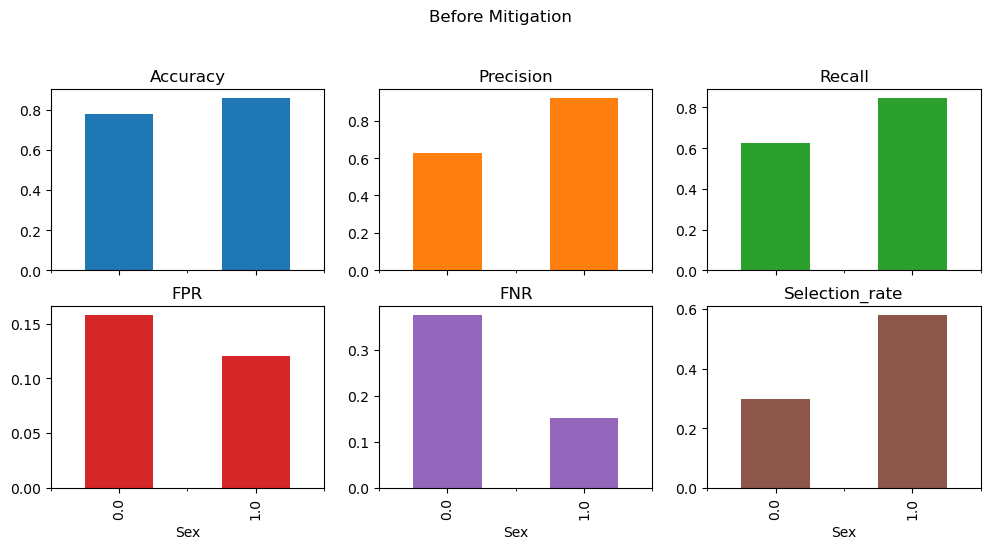

In [58]:
mf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Before Mitigation",
)

In [59]:
mf.by_group

,Accuracy,Precision,Recall,FPR,FNR,Selection_rate
Sex,,,,,,
0.0,0.777778,0.625000,0.625000,0.157895,0.375000,0.296296
1.0,0.859873,0.923077,0.848485,0.120690,0.151515,0.579618


In [60]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, demographic_parity_ratio, equalized_odds_ratio

dpd = demographic_parity_difference(y_test, y_test_pred, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, y_test_pred, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, y_test_pred, sensitive_features = sa_test)
eqr = equalized_odds_ratio(y_test, y_test_pred, sensitive_features=sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))
print(f'Value of equal odds ratio: {round(eqr, 2)}')

Demographic parity difference: 0.28
Equalized odds difference: 0.22
Demographic parity ratio: 0.51
Value of equal odds ratio: 0.74


1) Demographic difference in parity: if the absolute value is less than 0.1, then the model can be considered fair.
2) Balanced odds difference: if the absolute value is less than 0.1, then the model can be considered fair.
3) The difference is in equal opportunities: if the absolute value is less than 0.1, then the model can be considered fair.
4) Demographic parity coefficient: the fairness of this indicator ranges from 0.8 to 1.25.

In our case, the difference in demographic parity (0.21), demographic parity ratio (0.64)indicate unfairness, while the difference in equalization of chances (0.05) does not indicate unfairness.

-------------
**Bias mitigation technique using Fairlearn's ExponentiatedGradient with the Demographic Parity constraint.**

In [61]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

svm_model = SVC(C=100, gamma=0.001, kernel='rbf')
dp = DemographicParity()
dt_classifier_reduction = ExponentiatedGradient(svm_model, dp)

dt_classifier_reduction.fit(X_train, y_train, sensitive_features=sa_train)
prediction_dp = dt_classifier_reduction.predict(X_test)




-------------
**Bias mitigation technique using Fairlearn's ExponentiatedGradient with the EqualizedOdds constraint.**

In [62]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds

# Use EqualizedOdds instead of DemographicParity
eo = EqualizedOdds()

svm_model = SVC(C=100, gamma=0.001, kernel='rbf')

# Apply ExponentiatedGradient with EqualizedOdds
eg_classifier_eo = ExponentiatedGradient(svm_model, eo)
eg_classifier_eo.fit(X_train, y_train, sensitive_features=sa_train)
prediction_eo = eg_classifier_eo.predict(X_test)


Fairness Metrics after bias mitigation

In [63]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    "FPR": false_positive_rate,
    "FNR": false_negative_rate,
    'Selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=prediction_dp, sensitive_features=sa_test)


print("Fairness metrics by demographic parity\n")
# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Fairness metrics by demographic parity

Overall Metrics:
 Accuracy          0.793478
Precision         0.828571
Recall            0.813084
FPR               0.233766
FNR               0.186916
Selection_rate    0.570652
dtype: float64

Metrics by Group:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.555556   0.388889  0.875000  0.578947  0.125000        0.666667
1.0  0.834395   0.919540  0.808081  0.120690  0.191919        0.554140

Disparities:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.700152   0.469349  1.076149  2.476608  0.668750        1.168254
1.0  1.051566   1.109790  0.993847  0.516284  1.026768        0.971065


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



array([[<Axes: title={'center': 'Accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'Precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'Recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'FPR'}, xlabel='Sex'>,
        <Axes: title={'center': 'FNR'}, xlabel='Sex'>,
        <Axes: title={'center': 'Selection_rate'}, xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

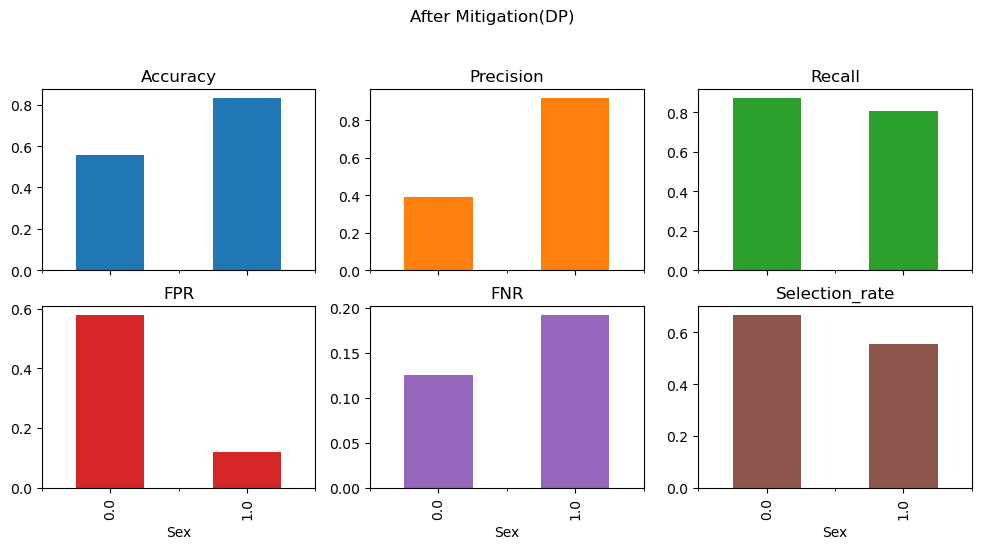

In [64]:
mf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="After Mitigation(DP)",
)

In [65]:
mf.by_group

,Accuracy,Precision,Recall,FPR,FNR,Selection_rate
Sex,,,,,,
0.0,0.555556,0.388889,0.875000,0.578947,0.125000,0.666667
1.0,0.834395,0.919540,0.808081,0.120690,0.191919,0.554140


In [66]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    "FPR": false_positive_rate,
    "FNR": false_negative_rate,
    'Selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=prediction_eo, sensitive_features=sa_test)


print("Fairness metrics by equalized odds\n")
# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Fairness metrics by equalized odds

Overall Metrics:
 Accuracy          0.842391
Precision         0.914894
Recall            0.803738
FPR               0.103896
FNR               0.196262
Selection_rate    0.510870
dtype: float64

Metrics by Group:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.777778   0.600000  0.750000  0.210526  0.250000        0.370370
1.0  0.853503   0.952381  0.808081  0.068966  0.191919        0.535032

Disparities:
      Accuracy  Precision    Recall       FPR       FNR  Selection_rate
Sex                                                                   
0.0  0.923297   0.655814  0.933140  2.026316  1.273810        0.724980
1.0  1.013191   1.040975  1.005403  0.663793  0.977874        1.047296


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



array([[<Axes: title={'center': 'Accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'Precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'Recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'FPR'}, xlabel='Sex'>,
        <Axes: title={'center': 'FNR'}, xlabel='Sex'>,
        <Axes: title={'center': 'Selection_rate'}, xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

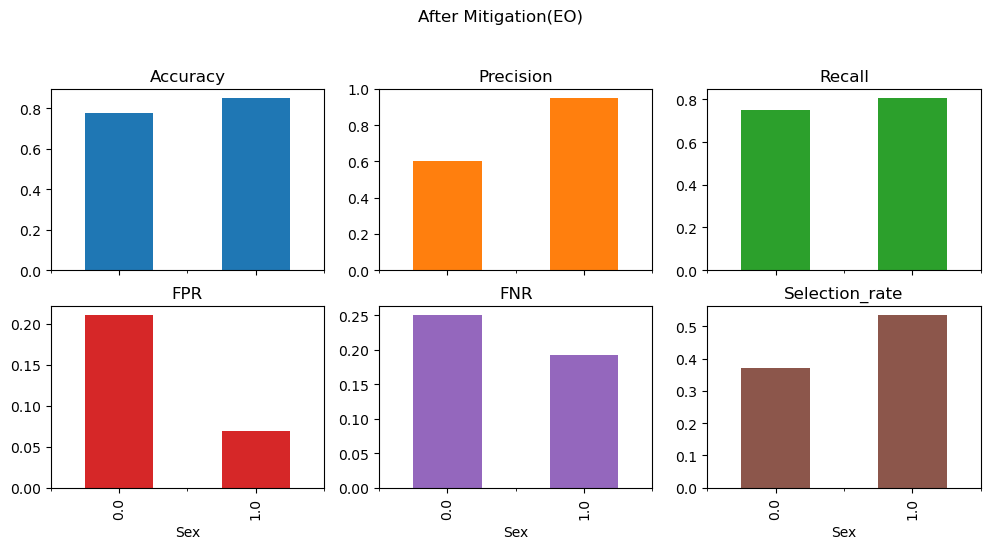

In [67]:
mf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="After Mitigation(EO)",
)

In [68]:
mf.by_group

,Accuracy,Precision,Recall,FPR,FNR,Selection_rate
Sex,,,,,,
0.0,0.777778,0.600000,0.750000,0.210526,0.250000,0.370370
1.0,0.853503,0.952381,0.808081,0.068966,0.191919,0.535032


In [69]:
dpd = demographic_parity_difference(y_test, prediction_dp, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, prediction_dp, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, prediction_dp, sensitive_features = sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))

Demographic parity difference: 0.11
Equalized odds difference: 0.46
Demographic parity ratio: 0.83


In [70]:
dpd = demographic_parity_difference(y_test, prediction_eo, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, prediction_eo, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, prediction_eo, sensitive_features = sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))

Demographic parity difference: 0.16
Equalized odds difference: 0.14
Demographic parity ratio: 0.69


1) Demographic difference in parity: if the absolute value is less than 0.1, then the model can be considered fair.
2) Balanced odds difference: if the absolute value is less than 0.1, then the model can be considered fair.
3) The difference is in equal opportunities: if the absolute value is less than 0.1, then the model can be considered fair.
4) Demographic parity coefficient: the fairness of this indicator ranges from 0.8 to 1.25.

In our case, the difference in demographic parity (0.01), demographic parity ratio (0.99) does not indicate unfairness, while the difference in equalization of chances (0.34) indicates unfairness.


----------------
Impact of Mitigation: The application of the Demographic Parity constraint has resulted in a more balanced selection rate between genders. However, this has come with a trade-off in terms of accuracy and precision, especially for females.

Trade-off Between Fairness and Performance: The mitigation strategy seems to have prioritized demographic parity (equal selection rates), leading to a decrease in other performance metrics for females. This is a common challenge in fairness interventions, where improving fairness in one aspect can lead to decreases in performance metrics.

Fairness Considerations: Despite the trade-offs, the model is now less biased in terms of selection rate, which was one of the initial fairness concerns.

**Improvement in Fairness: The intervention based on Equalized Odds has led to a reduction in both demographic and equalized odds disparities, indicating a more fair model.**

|RandomforestClassifier |                   |                                                  |            |
|------------------|--------------|----------------|---------------|
|                                 |Before mitigation|After DP|After EO|
|Demographic parity difference| 0.27|0.09|0.23|
|Equalized odds difference| 0.13| 0.25|0.14|
|Demographic parity ratio| 0.55|0.85|0.62|
|Accuracy|0.853261|0.8641|0.8750|
|Selection Rate|0.565217| 0.5978|0.565217|

|SVM |                   |                                                  |            |
|------------------|--------------|----------------|---------------|
|                                 |Before mitigation|After DP|After EO|
|Demographic parity difference| 0.28| 0.04|0.19|
|Equalized odds difference| 0.28|0.35|0.13|
|Demographic parity ratio|0.48|0.94|0.68|
|Accuracy|0.7989|0.7880|0.8478|
|Selection Rate|0.50|0.5760|0.5706|

1. Demographic difference in parity: if the absolute value is less than 0.1, then the model can be considered fair.
2. Balanced odds difference: if the absolute value is less than 0.1, then the model can be considered fair.
3. The difference is in equal opportunities: if the absolute value is less than 0.1, then the model can be considered fair.
<!-- 4. Demographic parity coefficient: the fairness of this indicator ranges from 0.8 to 1.25. -->